파이썬 머신러닝 완벽가이드 `ch5. 1~5 (4 제외) pg. 290~319(303~310 제외)` 필사

# 05. 회귀

## 01. 회귀 소개
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계 모델링하는 기법 통칭
- 연속형 숫자값 예측
- 머신러닝 회귀 예측 핵심 : 주어진 피처 & 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수 탐색**
- 회귀 유형 구분
  - 독립변수 개수
    - 1개 : 단일 회귀
    - 여러 개 : 다중 회귀
  - 회귀 계수 결합
    - 선형 : **선형 회귀** - 실제 값과 예측 값의 차이를 최소화하는 직선형 회귀선을 최적화
      - 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티값 적용
      - 일반 선형 회귀 : RSS 최소화, 규제 적용 X
      - 릿지 : 선형 회귀에 L2 규제 추가. 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
      - 라쏘 : L1 규제 적용 방식.L1 규제 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 함
      - 엘라스틱넷 : L2, L1 규제 함께 결합 → 피처 많은 데이터 세트에서 적용
      - 로지스틱 회귀 : 분류에 사용되는 선형 모델
    - 비선형 : 비선형 회귀

## 02. 단순 선형 회귀를 통한 회귀 이해
- 잔차 : `실제값 - 회귀모델`
- 최적의 회귀모델 = 잔차값이 최소인 모델
- 손실함수 : = 비용함수. RSS(w0, w1)

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
- 경사하강법 : 점진적으로 반복적인 계산을 통해 w 파라미터 값을 업데이트하며 오류 값이 최소가 되는 w 파라미터를 구하는 방식
- 경사 하강법 프로세스
  - Step 1 : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값 계산
  - Step 2 : w1을 업데이트 한 후 다시 비용 함수의 값 계산
  - Step 3 : 비용 함수의 값이 감소한 경우 Step 2 반복. 더이상 감소하지 않은 경우 w1, w0 구하고 반복 중지

## 05. 다항회귀와 과(대)적합/과소적합 이해
### 다항회귀 이해
- 다항회귀 : 회귀가 2차, 3차 방정식 등의 다항식으로 표현되는 것
- 다항회귀 = 선형회귀
- 사이킷런
  - 비선형 함수를 선형 모델에 적용시켜 다항회귀 구현
  - `PolynomialFeatures` 클래스 : fit(), transform() 이용해 단항식 피처를 Polynomial 피처로 변환

$$[x_1, x_2] → [1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$$

ex) [0, 1] → [1, 0, 1, 0, 0, 1]

ex) [2, 3] → [1, 2, 3, 4, 6, 9]

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


[3차 다항 계수 피처 값이 입력되면 결정 값을 반환하는 함수]

$$ y = 1 + 2x_1 + 3x_1^2 + 4x_2^3 $$

In [2]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


[일차 단항식 계수를 삼차 다항식 계수로 변환한 후 선형 회귀에 적용하면 다항회귀로 구현됨]

$$ [x_1, x_2] → [1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_1^3]$$

In [4]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀 구현

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 차수 높아질수록 과적합의 문제 발생

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y : 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


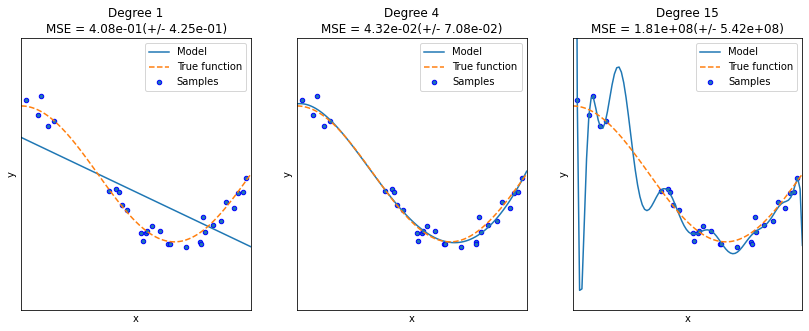

In [9]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

Degree 4 예측 곡선이 실제 데이터 세트와 가상 유사, MSE 값도 0.043으로 가장 뛰어난 예측 성능

→ 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서 복잡하지 않은 균형 잡힌 모델

### 편향-분산 트레이드 오프(Bias-Variance Trade off)
- Degree 1 : 매우 단순화된 모델, 지나치게 한 방향성으로 치우침 → 고편향성
- Degre 15 : 매우 복잡한 모델, 지나치게 높은 변동성 → 고분산성
- `저편향/저분산` : 예측 결과가 실제 결과에 매우 잘 근접하면서 예측 변동이 크지 않고 특정 부분에 집중, 뛰어난 성능
- `저편향/고분산` : 예측 결과가 실제 결과에 비교적 근접하지만 넓은 부분에 분포됨
- `고편향/저분산` : 정확한 결과에서 벗어나면서 예측이 특정 부분에 집중
- `고편향/고분산` : 예측 결과를 벗어나고 넓은 부분에 분포
